              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

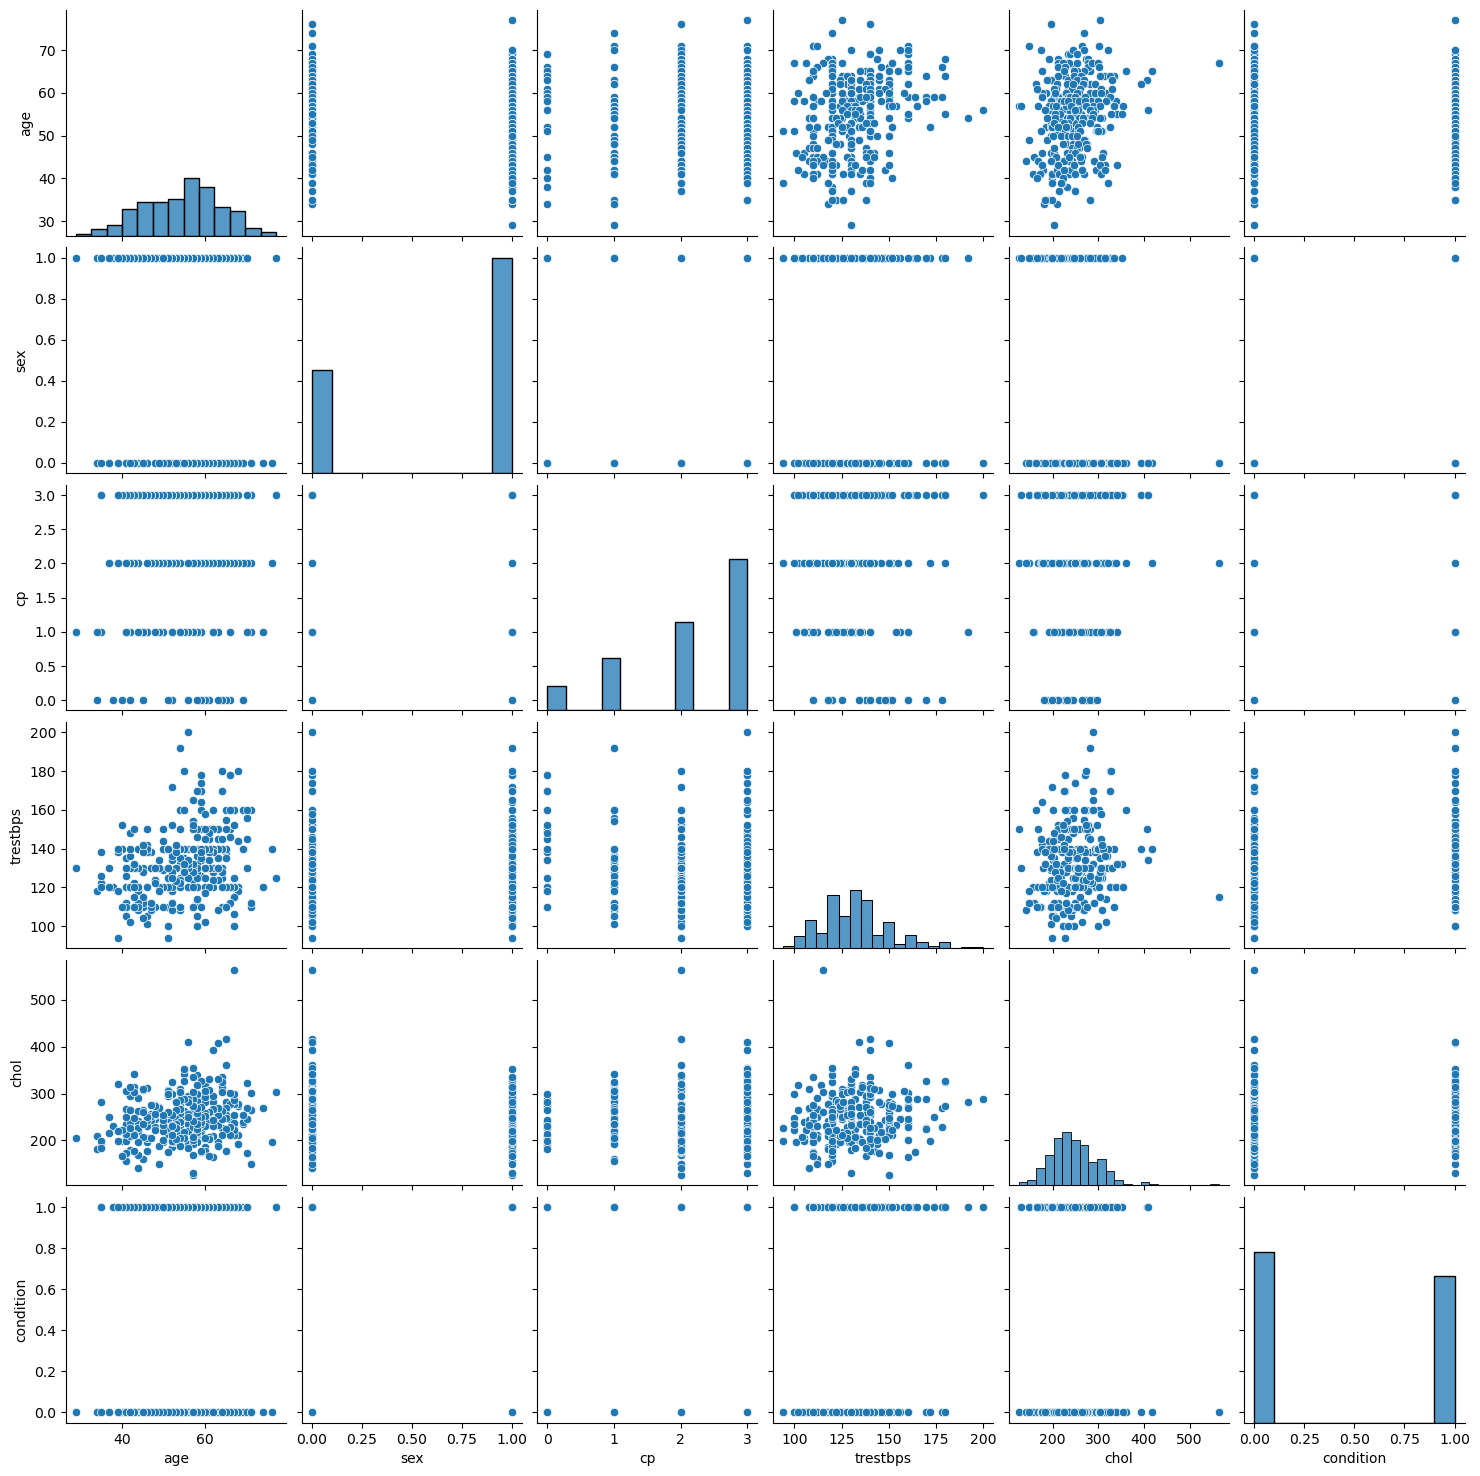

Las columnas seleccionadas son: Index(['age', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')
Precisión: 0.8
Exhaustividad: 0.7857142857142857
Puntaje F1: 0.7857142857142857


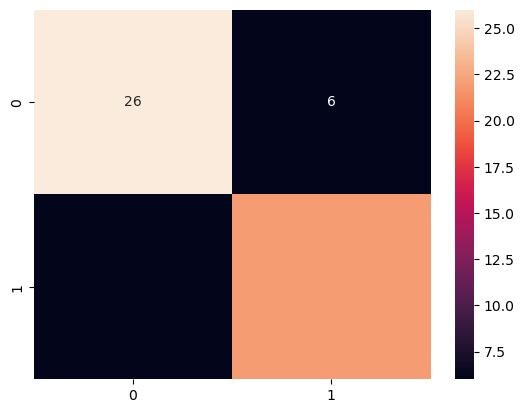

In [3]:
# Importando las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Cargando los datos
df = pd.read_csv('C:\\Users\\juane\\OneDrive\\Escritorio\\heart_cleveland_upload.csv')

# Análisis exploratorio de datos (EDA)
print(df.describe())
print(df.info())
sns.pairplot(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'condition']])  # Gráficos de dispersión de algunas variables
plt.show()

# Preprocesamiento de datos
df = df.dropna()  # Eliminar filas con valores faltantes
# Aquí puedes añadir más pasos de preprocesamiento si es necesario

# Selección de características
X = df.drop('condition', axis=1)
y = df['condition']

selector = SelectKBest(chi2, k=6)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support(indices=True)]
print("Las columnas seleccionadas son:", selected_features)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo con búsqueda en cuadrícula para el ajuste de hiperparámetros
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(X_train, y_train)

# Evaluación del modelo
y_pred = grid_search.predict(X_test)
print('Precisión:', accuracy_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))
print('Puntaje F1:', f1_score(y_test, y_pred))

# Visualización de los resultados
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.show()

